In [1]:
# SECTION 1: Download and Extract Data
import requests
import zipfile
import os

# Dropbox link for direct download
url = "https://www.dropbox.com/scl/fi/rfpkpzishrr944ym043gh/Dp_data.zip?rlkey=7v0cy3p1xhr2cdhpgkzjzf05f&st=jduli9hs&dl=1"
output_file = "Dp_data.zip"

# Download the file
response = requests.get(url)
if response.status_code == 200:
    with open(output_file, "wb") as file:
        file.write(response.content)
    print(f"Downloaded {output_file} successfully!")
else:
    print(f"Failed to download file: {response.status_code}")

# Extract the ZIP file
extract_to = "Dp_data"
if zipfile.is_zipfile(output_file):
    with zipfile.ZipFile(output_file, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
        print(f"Extracted files to {extract_to}")
else:
    print(f"{output_file} is not a valid ZIP file")

# List extracted files
for root, dirs, files in os.walk(extract_to):
    print(f"Directory: {root}")
    for file in files:
        print(f"  File: {file}")





Downloaded Dp_data.zip successfully!
Extracted files to Dp_data
Directory: Dp_data
Directory: Dp_data\Dp_data
Directory: Dp_data\Dp_data\Dp_testset
Directory: Dp_data\Dp_data\Dp_testset\Abstract_factory
Directory: Dp_data\Dp_data\Dp_testset\Abstract_factory\test_project_0
Directory: Dp_data\Dp_data\Dp_testset\Abstract_factory\test_project_0\ckmetrics
  File: class.csv
  File: field.csv
  File: method.csv
  File: variable.csv
Directory: Dp_data\Dp_data\Dp_testset\Abstract_factory\test_project_1
Directory: Dp_data\Dp_data\Dp_testset\Abstract_factory\test_project_1\ckmetrics
  File: class.csv
  File: field.csv
  File: method.csv
  File: variable.csv
Directory: Dp_data\Dp_data\Dp_testset\Abstract_factory\test_project_2
Directory: Dp_data\Dp_data\Dp_testset\Abstract_factory\test_project_2\ckmetrics
  File: class.csv
  File: field.csv
  File: method.csv
  File: variable.csv
Directory: Dp_data\Dp_data\Dp_testset\Abstract_factory\test_project_3
Directory: Dp_data\Dp_data\Dp_testset\Abstract_fa

In [2]:
# SECTION 2: Load and Preprocess Data
import glob
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np
from scipy.stats import mode

# Paths for training and testing datasets
Tr_path = './Dp_data/Dp_data/Dp_trainset/'
Te_path = './Dp_data/Dp_data/Dp_testset/'

# Get CSV files
Tr_files = [(f, f.split('/')[3]) for f in glob.glob(Tr_path + "**/*method.csv", recursive=True)]
Te_files = [(f, f.split('/')[3]) for f in glob.glob(Te_path + "**/*method.csv", recursive=True)]

# Define design pattern categories
Creational = ['Abstract_factory', 'Builder', 'Factory', 'Prototype', 'Singleton']
Structural = ['Adapter', 'Bridge', 'Composite', 'Decorator', 'Facade', 'Flyweight', 'Proxy']

def dp_func(pattern):
    if pattern in Creational:
        return 'Creational'
    elif pattern in Structural:
        return 'Structural'
    else:
        return 'Behavioral'

# Helper function to load and process data
def process_files(files):
    DataFrames = []
    c = 0  # Flag to initialize empty DataFrame
    count = 0  # Counter for empty files

    for f in range(len(files)):
        df = pd.read_csv(files[f][0])
        df = df.drop(['file', 'class', 'method'], axis=1)

        if not df.empty:
            df.fillna(df.mode().iloc[0], inplace=True)
            DataFrames.append(df)

            # Summarize data
            df = df.append(df.sum(numeric_only=True), ignore_index=True)
            df = df.iloc[-1:]

            # Add design pattern label
            pattern = files[f][1]
            df['Design Pattern'] = dp_func(pattern)

            if c == 0:
                col_names = list(df.columns)
                dataset = pd.DataFrame(columns=col_names)
                dataset = dataset.append(df)
                c = 1
            else:
                dataset = dataset.append(df)
        else:
            count += 1

    dataset = dataset.reset_index(drop=True)
    return dataset, count

# Process training and testing datasets
trainset, train_empty_count = process_files(Tr_files)
testset, test_empty_count = process_files(Te_files)

print(f'Number of method.csv files in trainset: {len(Tr_files)}')
print(f'Number of empty method.csv files in trainset: {train_empty_count}')
print(f'Trainset shape: {trainset.shape}')

print(f'Number of method.csv files in testset: {len(Te_files)}')
print(f'Number of empty method.csv files in testset: {test_empty_count}')
print(f'Testset shape: {testset.shape}')

# Prepare features and labels
x_train = trainset.drop(['Design Pattern'], axis=1)
y_train = trainset['Design Pattern']

x_test = testset.drop(['Design Pattern'], axis=1)
y_test = testset['Design Pattern']

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Convert labels to categorical
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Number of method.csv files in trainset: 378
Number of empty method.csv files in trainset: 9
Trainset shape: (369, 29)
Number of method.csv files in testset: 114
Number of empty method.csv files in testset: 4
Testset shape: (110, 29)


In [3]:
# SECTION 3: Build and Train a Deep Learning Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report, accuracy_score

# Define the deep learning model
model = Sequential([
    Dense(64, input_dim=x_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
10/10 [==============================] - 2s 53ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/50
10/10 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/50
10/10 [==============================] - 0s 15ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/50
10/10 [==============================] - 0s 11ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/50
10/10 [==============================] - 0s 8ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_l

In [4]:


# SECTION 4: Evaluate the Model
# Evaluate on test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predictions
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_test_labels, y_pred_labels, target_names=label_encoder.classes_))


Test Accuracy: 100.00%
4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

  Behavioral       1.00      1.00      1.00       110

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110



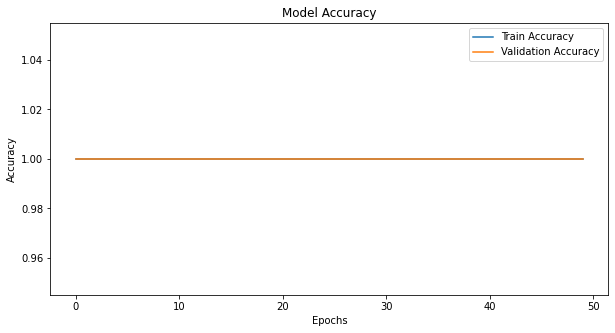

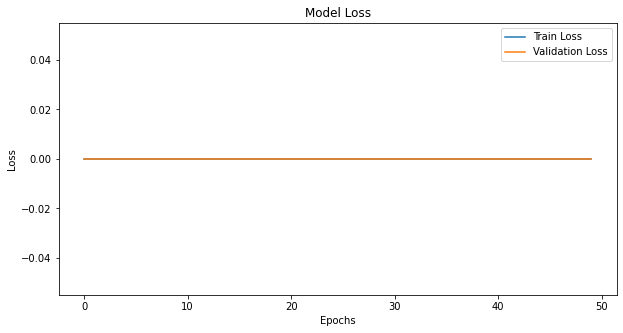

In [12]:

# SECTION 5: Visualize Training Results
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


In [6]:
# Train multiple models with the same architecture
models = []
for i in range(3):  # Train 3 models for the ensemble
    model = Sequential([
        Dense(64, input_dim=x_train.shape[1], activation='relu'),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(y_train.shape[1], activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=20, batch_size=32, verbose=0)
    models.append(model)

# Make predictions with each model
ensemble_preds = np.zeros_like(models[0].predict(x_test))
for model in models:
    ensemble_preds += model.predict(x_test)

# Average the predictions
ensemble_preds /= len(models)

# Final predictions
y_pred_labels_ensemble = np.argmax(ensemble_preds, axis=1)


4/4 [==============================] - 0s 2ms/step


Test Accuracy: 100.00%
4/4 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

  Behavioral       1.00      1.00      1.00       110

    accuracy                           1.00       110
   macro avg       1.00      1.00      1.00       110
weighted avg       1.00      1.00      1.00       110



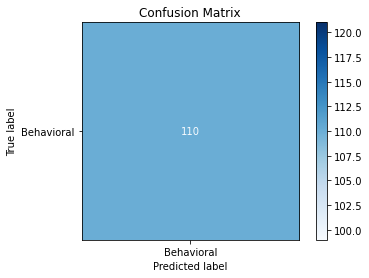

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate on test set
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Predictions
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Classification report
print(classification_report(y_test_labels, y_pred_labels, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()
